In [1]:
from platform import python_version
print(python_version())

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from operator import add
#import matplotlib.pyplot as plt
personinfo = pd.DataFrame(pd.read_csv((r"logs/all_together.csv")))
actionvalues = pd.DataFrame(pd.read_csv((r"action_values.csv")))
personality_action_difference_dict = {}
print(personinfo)

3.9.12
       Unnamed: 0  run_number  round_number  turn_number         _action_name  \
0               0           0             0            0  starts_conversation   
1               1           0             0            1     stands_in_corner   
2               2           0             0            2          leaves_room   
3               3           0             0            3     stands_in_corner   
4               4           0             0            4       makes_deeptalk   
...           ...         ...           ...          ...                  ...   
79995       79995          49            49         1595      gives_an_insult   
79996       79996          49            49         1596      makes_smalltalk   
79997       79997          49            49         1597        shows_concern   
79998       79998          49            49         1598               shares   
79999       79999          49            49         1599      gives_an_insult   

      person_before_

In [2]:
def set_up(personinfo):
    action_history = personinfo.loc[:,'_action_name']
    person_action_history = personinfo.loc[:,'person_before_action_name'].unique()
    personactionlist = []
    #count = 0
    #df = df[((df['A'] > 0) & (df['B'] > 0)) | ((df['A'] < 0) & (df['B'] < 0))]
    for person in person_action_history:
        #if count < 10:
            persondetails = pd.DataFrame(personinfo.loc[(personinfo['person_before_action_name'] == person) | (personinfo['person_after_action_conversation_partner'] == person)])
            #editeddetails = persondetails[['person_before_action_name', 'person_before_action_emotional_state', 'person_before_action_location_state']]
            persondetails.to_csv('personlogs/' + person + '_testing.csv')
            personactionlist.append(persondetails)
        #count += 1
    
    return person_action_history
    
person_list = set_up(personinfo=personinfo)
print(person_list)    

['Robin' 'Patrick' 'Ronnie' 'Jacquelyn' 'Phyllis' 'Agnes' 'Dorothy'
 'Shawn' 'David' 'Malcolm' 'Billie' 'Michael' 'Robert' 'Donald' 'Maria'
 'Edith' 'Nola' 'Jason' 'Francis' 'Martin' 'Andrew' 'Johnny' 'Elisabeth'
 'Catherine' 'Vicki' 'Laquita' 'Jerry' 'John' 'Brian' 'James' 'Mauricio'
 'Lillian']


In [3]:
def freq_dist(action_history):
    freq_dict = {}
    for action in action_history: #frequency distribution of person's actions
        if action in freq_dict:
            freq_dict[action] += 1
        else:
            freq_dict[action] = 1
    return dict(sorted(freq_dict.items()))

def plot_freq_dist(freq_dict , name):
        X = np.arange(len(freq_dict))
        plt.bar(range(len(freq_dict)), list(freq_dict.values()), width=0.2, align='center')
        #plt.bar(X-0.2, low_action_dist.values(), width=0.2, color='g', align='center')
        plt.xticks(range(len(freq_dict)), list(freq_dict.keys()))
        plt.rcParams.update({'font.size': 10})
        plt.title(name)
        plt.ylabel('Frequency')
        plt.xlabel('Actions')
        
        
        #colors = {'high':'blue', 'low':'green'}         
        #labels = list(colors.keys())
        #handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        ##plt.legend(handles, labels)
        plt.gcf().autofmt_xdate()
        
        filepath = 'freqdistgraphs/' + name + '.png'
        plt.savefig(filepath, bbox_inches="tight")
        plt.show()
    

In [4]:
def conv_mean(action_history):
    count = 0
    inConv = False
    convtot = []
    for action in action_history: #gets mean length of conversation
        if action == 'starts_conversation':
            count = 1
            inConv = True
        elif action == 'leaves_conversation':
            convtot.append(count)
            inConv = False
        elif inConv:
            count += 1
    if len(convtot):
        avgconv = sum(convtot) / len(convtot)
    else:
        avgconv = 0
    return avgconv


mean convo length for Robin  :  12.098214285714286


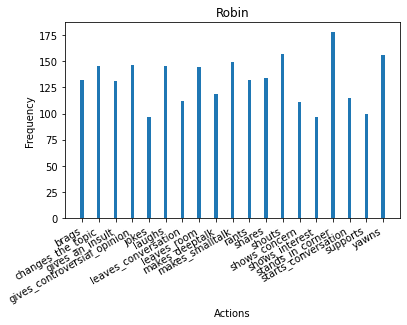

freq distribution {'brags': 132, 'changes_the_topic': 145, 'gives_an_insult': 131, 'gives_controversial_opinion': 146, 'jokes': 97, 'laughs': 145, 'leaves_conversation': 112, 'leaves_room': 144, 'makes_deeptalk': 119, 'makes_smalltalk': 149, 'rants': 132, 'shares': 134, 'shouts': 157, 'shows_concern': 111, 'shows_interest': 97, 'stands_in_corner': 178, 'starts_conversation': 115, 'supports': 100, 'yawns': 156}
TOTAL IS: [492, -291, 991, -468, -539]
average:  [0.2, -0.12, 0.4, -0.19, -0.22]
mean convo length for Patrick  :  9.434782608695652


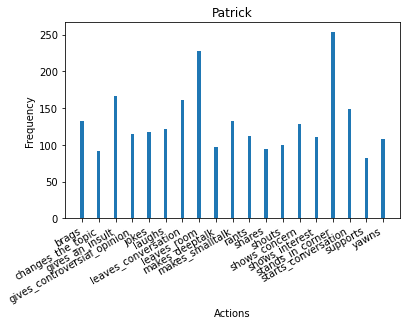

freq distribution {'brags': 132, 'changes_the_topic': 91, 'gives_an_insult': 166, 'gives_controversial_opinion': 115, 'jokes': 117, 'laughs': 121, 'leaves_conversation': 161, 'leaves_room': 228, 'makes_deeptalk': 97, 'makes_smalltalk': 133, 'rants': 112, 'shares': 94, 'shouts': 100, 'shows_concern': 129, 'shows_interest': 111, 'stands_in_corner': 254, 'starts_conversation': 149, 'supports': 82, 'yawns': 108}
TOTAL IS: [375, -206, 716, -539, -209]
average:  [0.15, -0.08, 0.29, -0.22, -0.08]
mean convo length for Ronnie  :  10.495327102803738


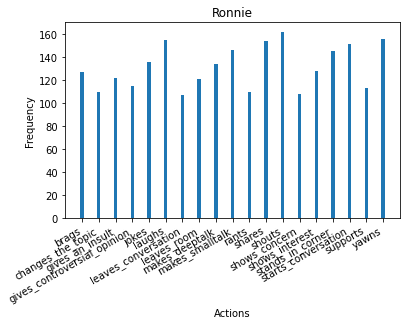

freq distribution {'brags': 127, 'changes_the_topic': 110, 'gives_an_insult': 122, 'gives_controversial_opinion': 115, 'jokes': 136, 'laughs': 155, 'leaves_conversation': 107, 'leaves_room': 121, 'makes_deeptalk': 134, 'makes_smalltalk': 146, 'rants': 110, 'shares': 154, 'shouts': 162, 'shows_concern': 108, 'shows_interest': 128, 'stands_in_corner': 145, 'starts_conversation': 151, 'supports': 113, 'yawns': 156}
TOTAL IS: [495, -225, 1096, -194, -628]
average:  [0.2, -0.09, 0.44, -0.08, -0.25]
mean convo length for Jacquelyn  :  12.675925925925926


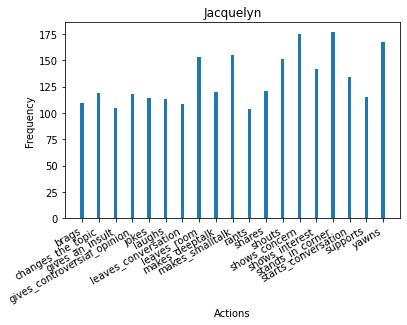

freq distribution {'brags': 109, 'changes_the_topic': 119, 'gives_an_insult': 105, 'gives_controversial_opinion': 118, 'jokes': 114, 'laughs': 113, 'leaves_conversation': 108, 'leaves_room': 153, 'makes_deeptalk': 120, 'makes_smalltalk': 155, 'rants': 104, 'shares': 121, 'shouts': 151, 'shows_concern': 175, 'shows_interest': 142, 'stands_in_corner': 177, 'starts_conversation': 134, 'supports': 115, 'yawns': 167}
TOTAL IS: [465, -237, 956, -204, -414]
average:  [0.19, -0.09, 0.38, -0.08, -0.17]
mean convo length for Phyllis  :  12.277777777777779


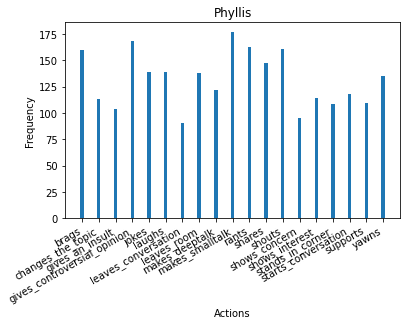

freq distribution {'brags': 160, 'changes_the_topic': 113, 'gives_an_insult': 104, 'gives_controversial_opinion': 168, 'jokes': 139, 'laughs': 139, 'leaves_conversation': 90, 'leaves_room': 138, 'makes_deeptalk': 122, 'makes_smalltalk': 177, 'rants': 163, 'shares': 147, 'shouts': 161, 'shows_concern': 95, 'shows_interest': 114, 'stands_in_corner': 108, 'starts_conversation': 118, 'supports': 109, 'yawns': 135}
TOTAL IS: [487, -281, 1266, -309, -748]
average:  [0.19, -0.11, 0.51, -0.12, -0.3]
mean convo length for Agnes  :  10.952380952380953


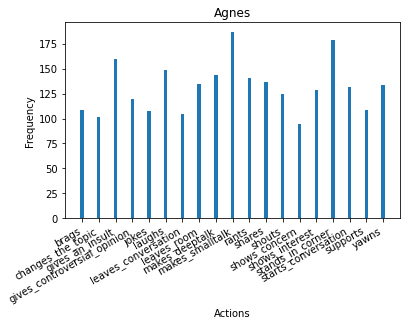

freq distribution {'brags': 109, 'changes_the_topic': 102, 'gives_an_insult': 160, 'gives_controversial_opinion': 120, 'jokes': 108, 'laughs': 149, 'leaves_conversation': 105, 'leaves_room': 135, 'makes_deeptalk': 144, 'makes_smalltalk': 187, 'rants': 141, 'shares': 137, 'shouts': 125, 'shows_concern': 95, 'shows_interest': 129, 'stands_in_corner': 179, 'starts_conversation': 132, 'supports': 109, 'yawns': 134}
TOTAL IS: [445, -222, 1028, -369, -443]
average:  [0.18, -0.09, 0.41, -0.15, -0.18]
mean convo length for Dorothy  :  10.040816326530612


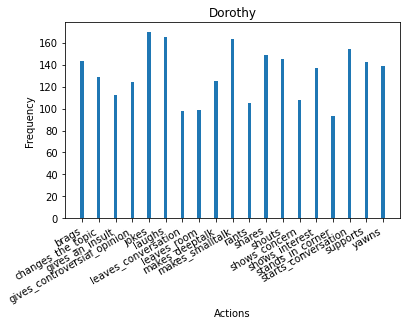

freq distribution {'brags': 143, 'changes_the_topic': 129, 'gives_an_insult': 112, 'gives_controversial_opinion': 124, 'jokes': 170, 'laughs': 165, 'leaves_conversation': 98, 'leaves_room': 99, 'makes_deeptalk': 125, 'makes_smalltalk': 163, 'rants': 105, 'shares': 149, 'shouts': 145, 'shows_concern': 108, 'shows_interest': 137, 'stands_in_corner': 93, 'starts_conversation': 154, 'supports': 142, 'yawns': 139}
TOTAL IS: [501, -253, 1229, -49, -768]
average:  [0.2, -0.1, 0.49, -0.02, -0.31]
mean convo length for Shawn  :  12.084905660377359


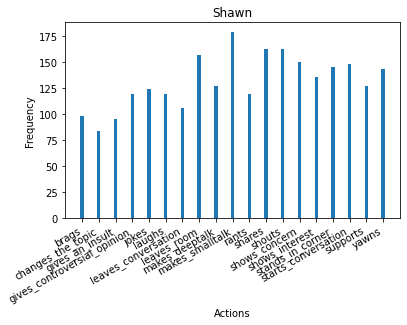

freq distribution {'brags': 98, 'changes_the_topic': 84, 'gives_an_insult': 95, 'gives_controversial_opinion': 119, 'jokes': 124, 'laughs': 119, 'leaves_conversation': 106, 'leaves_room': 157, 'makes_deeptalk': 127, 'makes_smalltalk': 179, 'rants': 119, 'shares': 162, 'shouts': 162, 'shows_concern': 150, 'shows_interest': 136, 'stands_in_corner': 145, 'starts_conversation': 148, 'supports': 127, 'yawns': 143}
TOTAL IS: [449, -203, 1114, -140, -520]
average:  [0.18, -0.08, 0.45, -0.06, -0.21]
mean convo length for David  :  12.0


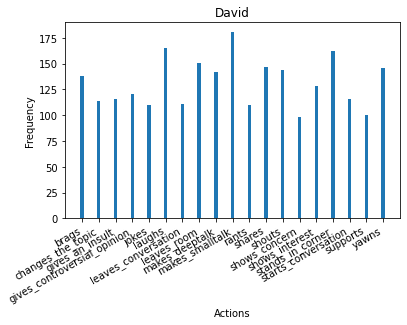

freq distribution {'brags': 138, 'changes_the_topic': 114, 'gives_an_insult': 116, 'gives_controversial_opinion': 121, 'jokes': 110, 'laughs': 165, 'leaves_conversation': 111, 'leaves_room': 151, 'makes_deeptalk': 142, 'makes_smalltalk': 181, 'rants': 110, 'shares': 147, 'shouts': 144, 'shows_concern': 98, 'shows_interest': 128, 'stands_in_corner': 162, 'starts_conversation': 116, 'supports': 100, 'yawns': 146}
TOTAL IS: [471, -235, 1036, -333, -568]
average:  [0.19, -0.09, 0.41, -0.13, -0.23]
mean convo length for Malcolm  :  10.944055944055943


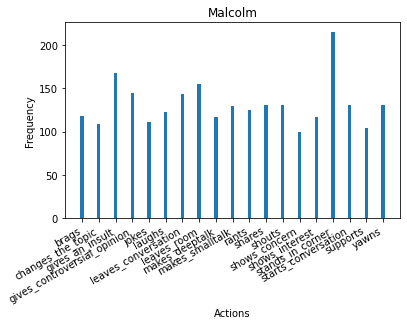

freq distribution {'brags': 118, 'changes_the_topic': 109, 'gives_an_insult': 168, 'gives_controversial_opinion': 144, 'jokes': 111, 'laughs': 122, 'leaves_conversation': 143, 'leaves_room': 155, 'makes_deeptalk': 117, 'makes_smalltalk': 129, 'rants': 125, 'shares': 131, 'shouts': 131, 'shows_concern': 99, 'shows_interest': 117, 'stands_in_corner': 215, 'starts_conversation': 131, 'supports': 104, 'yawns': 131}
TOTAL IS: [489, -253, 883, -497, -372]
average:  [0.2, -0.1, 0.35, -0.2, -0.15]
mean convo length for Billie  :  11.831460674157304


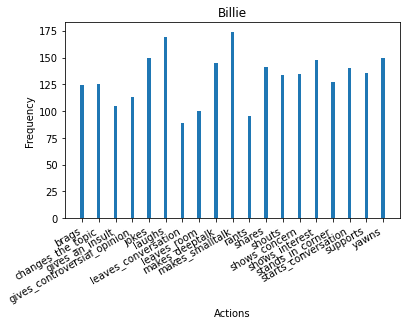

freq distribution {'brags': 124, 'changes_the_topic': 125, 'gives_an_insult': 105, 'gives_controversial_opinion': 113, 'jokes': 150, 'laughs': 169, 'leaves_conversation': 89, 'leaves_room': 100, 'makes_deeptalk': 145, 'makes_smalltalk': 174, 'rants': 95, 'shares': 141, 'shouts': 134, 'shows_concern': 135, 'shows_interest': 148, 'stands_in_corner': 127, 'starts_conversation': 140, 'supports': 136, 'yawns': 150}
TOTAL IS: [498, -238, 1136, -45, -640]
average:  [0.2, -0.1, 0.45, -0.02, -0.26]
mean convo length for Michael  :  11.217391304347826


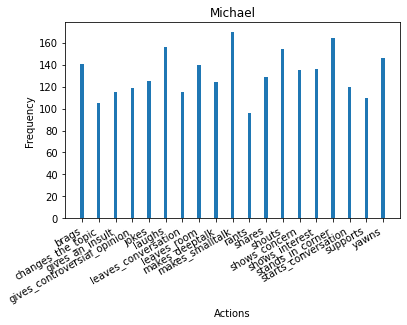

freq distribution {'brags': 141, 'changes_the_topic': 105, 'gives_an_insult': 115, 'gives_controversial_opinion': 119, 'jokes': 125, 'laughs': 156, 'leaves_conversation': 115, 'leaves_room': 140, 'makes_deeptalk': 124, 'makes_smalltalk': 170, 'rants': 96, 'shares': 129, 'shouts': 154, 'shows_concern': 135, 'shows_interest': 136, 'stands_in_corner': 164, 'starts_conversation': 120, 'supports': 110, 'yawns': 146}
TOTAL IS: [443, -224, 1009, -228, -520]
average:  [0.18, -0.09, 0.4, -0.09, -0.21]
mean convo length for Robert  :  11.235955056179776


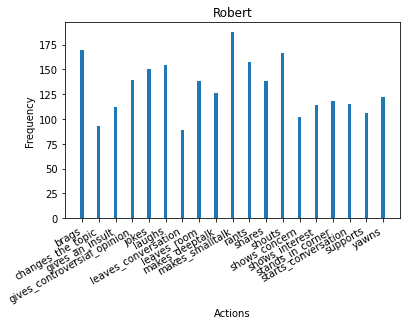

freq distribution {'brags': 170, 'changes_the_topic': 93, 'gives_an_insult': 112, 'gives_controversial_opinion': 139, 'jokes': 150, 'laughs': 155, 'leaves_conversation': 89, 'leaves_room': 138, 'makes_deeptalk': 126, 'makes_smalltalk': 188, 'rants': 158, 'shares': 138, 'shouts': 167, 'shows_concern': 102, 'shows_interest': 114, 'stands_in_corner': 118, 'starts_conversation': 115, 'supports': 106, 'yawns': 122}
TOTAL IS: [422, -232, 1250, -260, -706]
average:  [0.17, -0.09, 0.5, -0.1, -0.28]
mean convo length for Donald  :  15.126126126126126


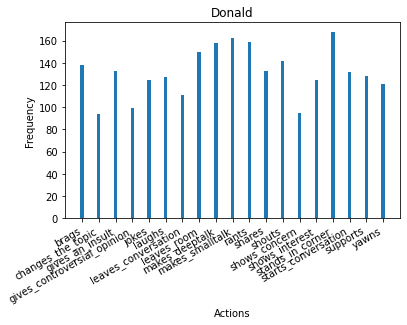

freq distribution {'brags': 138, 'changes_the_topic': 94, 'gives_an_insult': 133, 'gives_controversial_opinion': 99, 'jokes': 125, 'laughs': 127, 'leaves_conversation': 111, 'leaves_room': 150, 'makes_deeptalk': 158, 'makes_smalltalk': 162, 'rants': 159, 'shares': 133, 'shouts': 142, 'shows_concern': 95, 'shows_interest': 125, 'stands_in_corner': 168, 'starts_conversation': 132, 'supports': 128, 'yawns': 121}
TOTAL IS: [447, -193, 1097, -309, -483]
average:  [0.18, -0.08, 0.44, -0.12, -0.19]
mean convo length for Maria  :  10.869565217391305


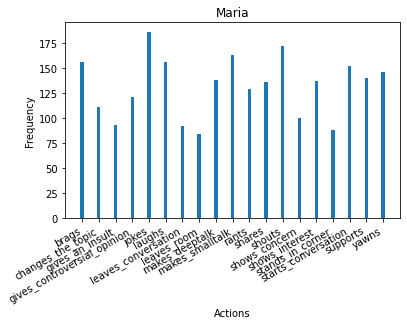

freq distribution {'brags': 156, 'changes_the_topic': 111, 'gives_an_insult': 93, 'gives_controversial_opinion': 121, 'jokes': 186, 'laughs': 156, 'leaves_conversation': 92, 'leaves_room': 84, 'makes_deeptalk': 138, 'makes_smalltalk': 163, 'rants': 129, 'shares': 136, 'shouts': 172, 'shows_concern': 100, 'shows_interest': 137, 'stands_in_corner': 88, 'starts_conversation': 152, 'supports': 140, 'yawns': 146}
TOTAL IS: [480, -232, 1313, -3, -817]
average:  [0.19, -0.09, 0.53, -0.0, -0.33]
mean convo length for Edith  :  10.0


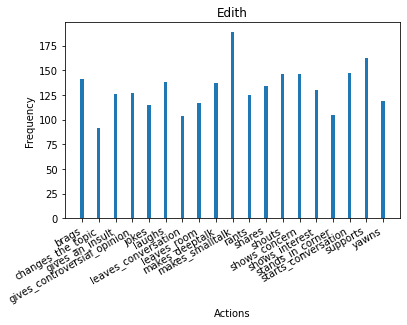

freq distribution {'brags': 141, 'changes_the_topic': 92, 'gives_an_insult': 126, 'gives_controversial_opinion': 127, 'jokes': 115, 'laughs': 138, 'leaves_conversation': 104, 'leaves_room': 117, 'makes_deeptalk': 137, 'makes_smalltalk': 189, 'rants': 125, 'shares': 134, 'shouts': 146, 'shows_concern': 146, 'shows_interest': 130, 'stands_in_corner': 105, 'starts_conversation': 147, 'supports': 162, 'yawns': 119}
TOTAL IS: [431, -219, 1214, -96, -559]
average:  [0.17, -0.09, 0.49, -0.04, -0.22]
mean convo length for Nola  :  13.278846153846153


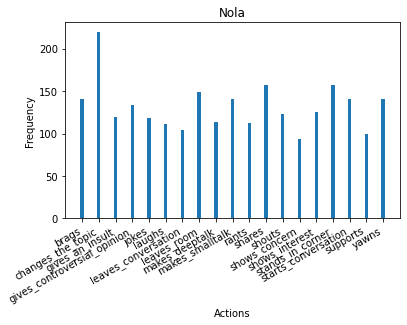

freq distribution {'brags': 141, 'changes_the_topic': 220, 'gives_an_insult': 119, 'gives_controversial_opinion': 134, 'jokes': 118, 'laughs': 111, 'leaves_conversation': 104, 'leaves_room': 149, 'makes_deeptalk': 114, 'makes_smalltalk': 141, 'rants': 112, 'shares': 157, 'shouts': 123, 'shows_concern': 93, 'shows_interest': 125, 'stands_in_corner': 157, 'starts_conversation': 141, 'supports': 100, 'yawns': 141}
TOTAL IS: [609, -354, 1020, -418, -672]
average:  [0.24, -0.14, 0.41, -0.17, -0.27]
mean convo length for Jason  :  11.433566433566433


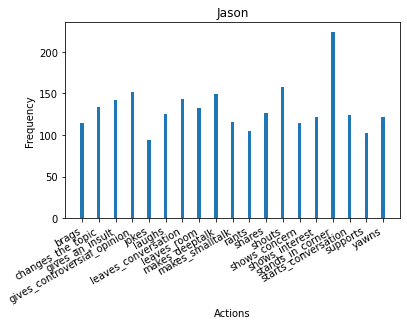

freq distribution {'brags': 114, 'changes_the_topic': 134, 'gives_an_insult': 142, 'gives_controversial_opinion': 152, 'jokes': 94, 'laughs': 125, 'leaves_conversation': 143, 'leaves_room': 132, 'makes_deeptalk': 149, 'makes_smalltalk': 116, 'rants': 105, 'shares': 127, 'shouts': 158, 'shows_concern': 114, 'shows_interest': 122, 'stands_in_corner': 224, 'starts_conversation': 124, 'supports': 103, 'yawns': 122}
TOTAL IS: [568, -286, 875, -475, -405]
average:  [0.23, -0.11, 0.35, -0.19, -0.16]
mean convo length for Francis  :  12.37037037037037


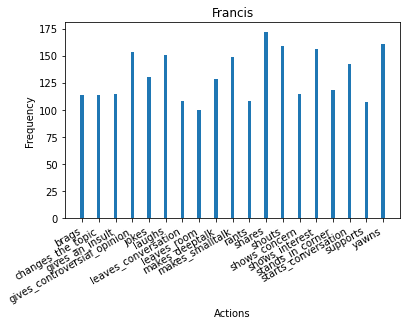

freq distribution {'brags': 114, 'changes_the_topic': 114, 'gives_an_insult': 115, 'gives_controversial_opinion': 153, 'jokes': 130, 'laughs': 151, 'leaves_conversation': 108, 'leaves_room': 100, 'makes_deeptalk': 128, 'makes_smalltalk': 149, 'rants': 108, 'shares': 172, 'shouts': 159, 'shows_concern': 115, 'shows_interest': 156, 'stands_in_corner': 118, 'starts_conversation': 142, 'supports': 107, 'yawns': 161}
TOTAL IS: [574, -267, 1136, -166, -679]
average:  [0.23, -0.11, 0.45, -0.07, -0.27]
mean convo length for Martin  :  10.016666666666667


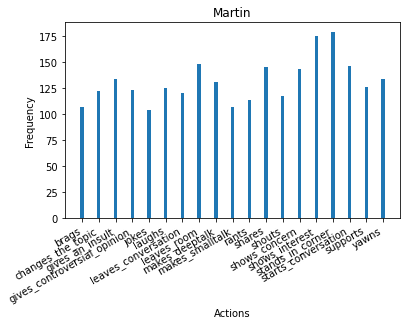

freq distribution {'brags': 107, 'changes_the_topic': 122, 'gives_an_insult': 134, 'gives_controversial_opinion': 123, 'jokes': 104, 'laughs': 125, 'leaves_conversation': 120, 'leaves_room': 148, 'makes_deeptalk': 131, 'makes_smalltalk': 107, 'rants': 114, 'shares': 145, 'shouts': 117, 'shows_concern': 143, 'shows_interest': 175, 'stands_in_corner': 179, 'starts_conversation': 146, 'supports': 126, 'yawns': 134}
TOTAL IS: [589, -245, 921, -246, -413]
average:  [0.24, -0.1, 0.37, -0.1, -0.17]
mean convo length for Andrew  :  12.814814814814815


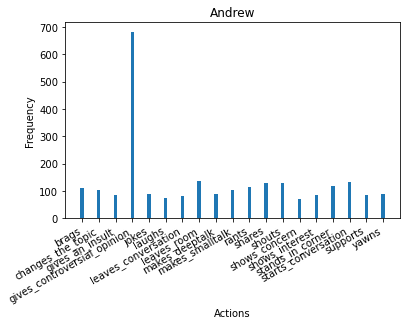

freq distribution {'brags': 109, 'changes_the_topic': 105, 'gives_an_insult': 84, 'gives_controversial_opinion': 682, 'jokes': 87, 'laughs': 76, 'leaves_conversation': 81, 'leaves_room': 137, 'makes_deeptalk': 88, 'makes_smalltalk': 105, 'rants': 114, 'shares': 129, 'shouts': 129, 'shows_concern': 69, 'shows_interest': 85, 'stands_in_corner': 117, 'starts_conversation': 131, 'supports': 85, 'yawns': 87}
TOTAL IS: [984, -787, 1461, -863, -1097]
average:  [0.39, -0.31, 0.58, -0.35, -0.44]
mean convo length for Johnny  :  10.417391304347825


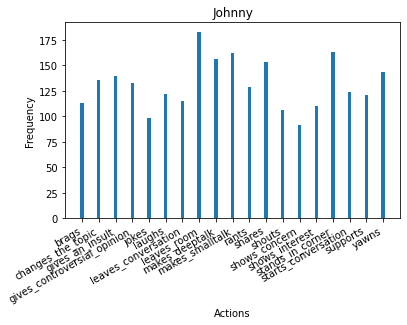

freq distribution {'brags': 113, 'changes_the_topic': 136, 'gives_an_insult': 140, 'gives_controversial_opinion': 133, 'jokes': 98, 'laughs': 122, 'leaves_conversation': 115, 'leaves_room': 183, 'makes_deeptalk': 156, 'makes_smalltalk': 162, 'rants': 129, 'shares': 153, 'shouts': 106, 'shows_concern': 92, 'shows_interest': 110, 'stands_in_corner': 163, 'starts_conversation': 124, 'supports': 121, 'yawns': 144}
TOTAL IS: [526, -269, 1017, -454, -475]
average:  [0.21, -0.11, 0.41, -0.18, -0.19]
mean convo length for Elisabeth  :  11.731707317073171


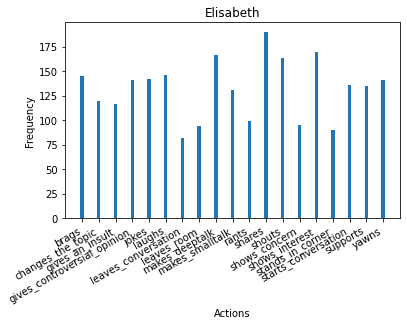

freq distribution {'brags': 145, 'changes_the_topic': 119, 'gives_an_insult': 116, 'gives_controversial_opinion': 141, 'jokes': 142, 'laughs': 146, 'leaves_conversation': 82, 'leaves_room': 94, 'makes_deeptalk': 166, 'makes_smalltalk': 131, 'rants': 99, 'shares': 190, 'shouts': 163, 'shows_concern': 95, 'shows_interest': 169, 'stands_in_corner': 90, 'starts_conversation': 136, 'supports': 135, 'yawns': 141}
TOTAL IS: [654, -260, 1276, -64, -799]
average:  [0.26, -0.1, 0.51, -0.03, -0.32]
mean convo length for Catherine  :  11.359649122807017


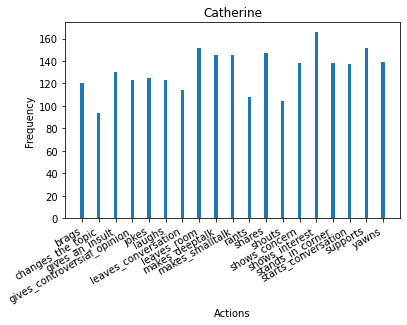

freq distribution {'brags': 120, 'changes_the_topic': 94, 'gives_an_insult': 130, 'gives_controversial_opinion': 123, 'jokes': 125, 'laughs': 123, 'leaves_conversation': 114, 'leaves_room': 152, 'makes_deeptalk': 145, 'makes_smalltalk': 145, 'rants': 108, 'shares': 147, 'shouts': 104, 'shows_concern': 138, 'shows_interest': 166, 'stands_in_corner': 138, 'starts_conversation': 137, 'supports': 152, 'yawns': 139}
TOTAL IS: [530, -217, 1054, -141, -453]
average:  [0.21, -0.09, 0.42, -0.06, -0.18]
mean convo length for Vicki  :  12.218181818181819


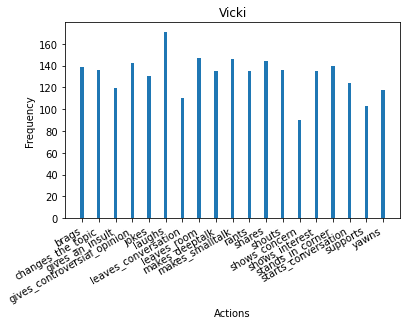

freq distribution {'brags': 139, 'changes_the_topic': 136, 'gives_an_insult': 119, 'gives_controversial_opinion': 142, 'jokes': 130, 'laughs': 171, 'leaves_conversation': 110, 'leaves_room': 147, 'makes_deeptalk': 135, 'makes_smalltalk': 146, 'rants': 135, 'shares': 144, 'shouts': 136, 'shows_concern': 90, 'shows_interest': 135, 'stands_in_corner': 140, 'starts_conversation': 124, 'supports': 103, 'yawns': 118}
TOTAL IS: [546, -278, 1084, -347, -663]
average:  [0.22, -0.11, 0.43, -0.14, -0.27]
mean convo length for Laquita  :  8.948387096774194


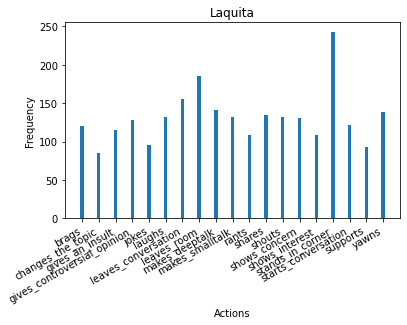

freq distribution {'brags': 120, 'changes_the_topic': 85, 'gives_an_insult': 115, 'gives_controversial_opinion': 128, 'jokes': 96, 'laughs': 132, 'leaves_conversation': 155, 'leaves_room': 185, 'makes_deeptalk': 141, 'makes_smalltalk': 132, 'rants': 109, 'shares': 135, 'shouts': 132, 'shows_concern': 131, 'shows_interest': 108, 'stands_in_corner': 243, 'starts_conversation': 121, 'supports': 93, 'yawns': 139}
TOTAL IS: [465, -213, 809, -471, -305]
average:  [0.19, -0.09, 0.32, -0.19, -0.12]
mean convo length for Jerry  :  9.88


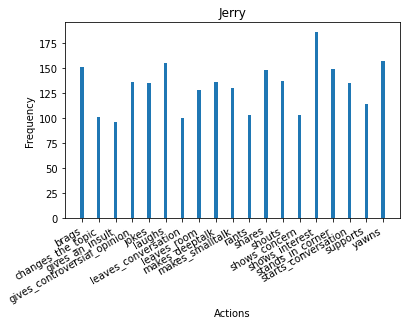

freq distribution {'brags': 151, 'changes_the_topic': 101, 'gives_an_insult': 96, 'gives_controversial_opinion': 136, 'jokes': 135, 'laughs': 155, 'leaves_conversation': 100, 'leaves_room': 128, 'makes_deeptalk': 136, 'makes_smalltalk': 130, 'rants': 103, 'shares': 148, 'shouts': 137, 'shows_concern': 103, 'shows_interest': 186, 'stands_in_corner': 149, 'starts_conversation': 135, 'supports': 114, 'yawns': 157}
TOTAL IS: [577, -237, 1076, -140, -650]
average:  [0.23, -0.09, 0.43, -0.06, -0.26]
mean convo length for John  :  11.841121495327103


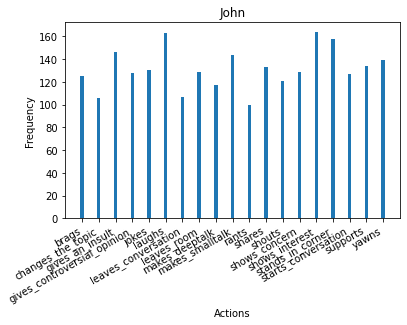

freq distribution {'brags': 125, 'changes_the_topic': 106, 'gives_an_insult': 146, 'gives_controversial_opinion': 128, 'jokes': 130, 'laughs': 163, 'leaves_conversation': 107, 'leaves_room': 129, 'makes_deeptalk': 117, 'makes_smalltalk': 144, 'rants': 100, 'shares': 133, 'shouts': 121, 'shows_concern': 129, 'shows_interest': 164, 'stands_in_corner': 158, 'starts_conversation': 127, 'supports': 134, 'yawns': 139}
TOTAL IS: [504, -234, 994, -190, -493]
average:  [0.2, -0.09, 0.4, -0.08, -0.2]
mean convo length for Brian  :  11.645833333333334


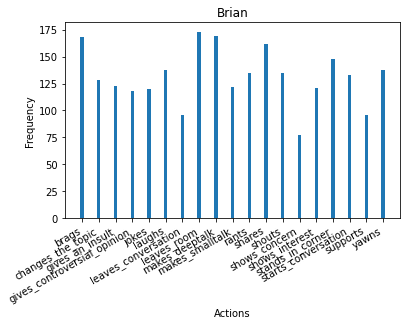

freq distribution {'brags': 168, 'changes_the_topic': 128, 'gives_an_insult': 123, 'gives_controversial_opinion': 118, 'jokes': 120, 'laughs': 138, 'leaves_conversation': 96, 'leaves_room': 173, 'makes_deeptalk': 169, 'makes_smalltalk': 122, 'rants': 135, 'shares': 162, 'shouts': 135, 'shows_concern': 77, 'shows_interest': 121, 'stands_in_corner': 148, 'starts_conversation': 133, 'supports': 96, 'yawns': 138}
TOTAL IS: [576, -246, 1114, -374, -658]
average:  [0.23, -0.1, 0.45, -0.15, -0.26]
mean convo length for James  :  10.39047619047619


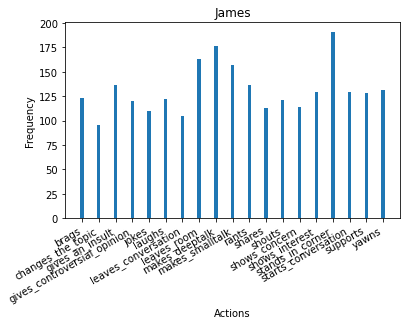

freq distribution {'brags': 123, 'changes_the_topic': 96, 'gives_an_insult': 136, 'gives_controversial_opinion': 120, 'jokes': 110, 'laughs': 122, 'leaves_conversation': 105, 'leaves_room': 163, 'makes_deeptalk': 176, 'makes_smalltalk': 157, 'rants': 136, 'shares': 113, 'shouts': 121, 'shows_concern': 114, 'shows_interest': 129, 'stands_in_corner': 191, 'starts_conversation': 129, 'supports': 128, 'yawns': 131}
TOTAL IS: [477, -216, 1017, -337, -388]
average:  [0.19, -0.09, 0.41, -0.13, -0.16]
mean convo length for Mauricio  :  14.390243902439025


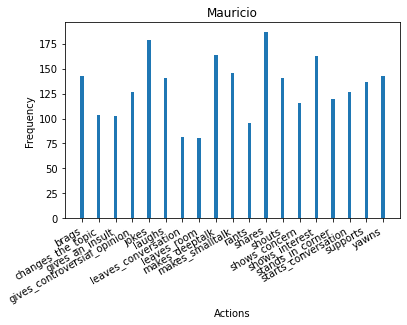

freq distribution {'brags': 143, 'changes_the_topic': 104, 'gives_an_insult': 103, 'gives_controversial_opinion': 127, 'jokes': 179, 'laughs': 141, 'leaves_conversation': 82, 'leaves_room': 81, 'makes_deeptalk': 164, 'makes_smalltalk': 146, 'rants': 96, 'shares': 187, 'shouts': 141, 'shows_concern': 116, 'shows_interest': 163, 'stands_in_corner': 120, 'starts_conversation': 127, 'supports': 137, 'yawns': 143}
TOTAL IS: [599, -231, 1245, 9, -728]
average:  [0.24, -0.09, 0.5, 0.0, -0.29]
mean convo length for Lillian  :  10.673913043478262


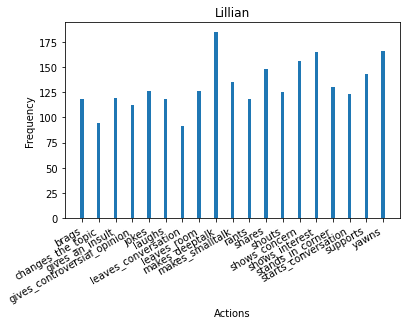

freq distribution {'brags': 118, 'changes_the_topic': 95, 'gives_an_insult': 119, 'gives_controversial_opinion': 112, 'jokes': 126, 'laughs': 118, 'leaves_conversation': 92, 'leaves_room': 126, 'makes_deeptalk': 185, 'makes_smalltalk': 135, 'rants': 118, 'shares': 148, 'shouts': 125, 'shows_concern': 156, 'shows_interest': 165, 'stands_in_corner': 130, 'starts_conversation': 123, 'supports': 143, 'yawns': 166}
TOTAL IS: [570, -207, 1111, -79, -468]
average:  [0.23, -0.08, 0.44, -0.03, -0.19]

Key        Label          
Robin        [1.2, 0.88, 1.4, 0.81, 0.78]
Patrick        [1.15, 0.92, 1.29, 0.78, 1.08]
Ronnie        [1.2, 0.91, 1.44, 1.08, 0.75]
Jacquelyn        [1.19, 0.91, 1.38, 1.08, 1.17]
Phyllis        [1.19, 0.89, 0.49, 0.88, 0.7]
Agnes        [1.18, 0.91, 0.59, 0.85, 1.18]
Dorothy        [1.2, 0.9, 0.51, 1.02, 0.69]
Shawn        [1.18, 0.92, 0.55, 1.06, 1.21]
David        [1.19, 1.09, 1.41, 0.87, 0.77]
Malcolm        [1.2, 1.1, 1.35, 0.8, 1.15]
Billie        [1.2, 1.1, 1.45, 

In [5]:
#count = 0
for x in person_list:   #gets the difference between personality and mean action vector
    #if count < 10:
        tot = [0,0,0,0,0]
        filepath = "personlogs/" + x + "_testing.csv"
        individualinfo = pd.DataFrame(pd.read_csv((filepath)))
        indiactioninfo = pd.DataFrame(individualinfo.loc[individualinfo['person_before_action_name'] == x])
        indi_action_history = indiactioninfo.loc[:,'_action_name']
        basepersonality = indiactioninfo.loc[:,'person_before_action_personality_vector']
        baseplist = []
        item = basepersonality.iloc(0)[0]
        split_item = item[1:-1].split(" ")
        baseplist = []
        for item in split_item:
            if item != ' ' and item != '':
                baseplist.append(item)
    
        action_length = conv_mean(indi_action_history)                #finds the mean conversation length per person
        print("mean convo length for", x, " : ", str(action_length))
        freq_distribution = freq_dist(indi_action_history)             #finds the frequency distribution of actions per person
        plot_freq_dist(freq_distribution, x)
        print("freq distribution", freq_distribution)
        intcount = 0
        for action in indi_action_history:
            mapped_actions = pd.DataFrame(actionvalues.loc[actionvalues['action_name'] == action])
            #print(mapped_actions)
            #print('------------------------------------')
            for item in (mapped_actions.loc[:,'most_likely_personality_vector_OCEAN']):
                intlist = json.loads(item)
                tot = list(map(add, intlist, tot))
            
            intcount += 1
        print('TOTAL IS:', tot)
        avg_vector = []
        for item in tot:
            avg_vector.append(round(item/intcount,2))
        print("average: ", avg_vector)
        #difference_1 = set(list_1).difference(set(list_2))
        difvector = []
        for index in range(len(avg_vector)):
            item = float(avg_vector[index])
            item2 = float(baseplist[index])
            diff = round(abs(item - item2),2)
            difvector.append(diff)
        
        personality_action_difference_dict[x] = difvector
        indi_action_history.to_csv('personlogstesting/' + x + '_testing.csv')
    #count += 1
    
    #action_log = x[2]
    #personality = x[1]
    #mlv = action_log[:,2] 
    #action_avg = np.mean(mlv, axis = 0)   #averages most likely vector of each action
    #action_diff.append(np.subtract(personality - action_avg))
#print(action_diff) 

print("\n{:<10} {:<15}".format('Key','Label'))
for k in personality_action_difference_dict.keys():
    item = personality_action_difference_dict[k]
    print(k,"      ", item)
    

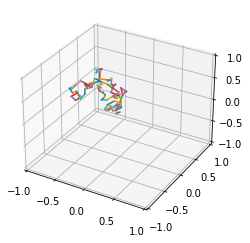

In [6]:
signs = [-1, 1]
magnitudes = [mag / 100 for mag in range(1,10)]

num_dimensions = 3
num_change_vectors = 100

example_vectors = np.array([[np.random.choice(magnitudes) * np.random.choice(signs) for _ in range(num_dimensions)] for _ in range(num_change_vectors)])

# Obsolete matplotlib method (second method is better)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

prev_pos = np.array([0,0,0])
#Plot the change vectors
for example_vector in example_vectors:
    x1,y1,z1 = prev_pos
    new_pos = prev_pos + example_vector
    x2,y2,z2 = new_pos
    ax.plot((x1,x2),(y1,y2),(z1,z2))
    prev_pos = new_pos

In [7]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

rs = np.random.RandomState()
rs.seed(0)

In [8]:
def plot_3D_positions(positions):
    x, y, z = positions
    
    index = np.array([x for x in range(10)])

    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        marker=dict(
            size=4,
            colorscale='Viridis',
        ),
        line=dict(
            color=index,
            width=2
        ))])

    fig.update_layout(
        width=800,
        height=700,
        autosize=False,
        scene=dict(
            xaxis_title="Pleasure",
            yaxis_title="Arousal",
            zaxis_title="Dominance",
            xaxis = dict(nticks=4, range=[-1,1],),
            yaxis = dict(nticks=4, range=[-1,1],),
            zaxis = dict(nticks=4, range=[-1,1],),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=0,
                    y=1.0707,
                    z=1,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )
    
    return fig

for x in person_list:
    filepath = "personlogs/" + x + "_testing.csv"
    individualinfo = pd.DataFrame(pd.read_csv((filepath)))
    indiactioninfo = pd.DataFrame(individualinfo.loc[(individualinfo['person_before_action_name']== x)| (individualinfo['partner_after_action_name'] == x)])
    firstruninfo = pd.DataFrame(indiactioninfo.loc[indiactioninfo['run_number'] == 0])
    indi_action_history = firstruninfo[['person_before_action_name','person_after_action_emotional_state','partner_after_action_emotional_state']]
   
    pleasure_scale = []
    arousal_scale = []
    dominance_scale = []
    for index, row in indi_action_history.iterrows():
        #print(row['person_before_action_name'], row['person_after_action_emotional_state'], row['partner_after_action_emotional_state'])
        if row['person_before_action_name'] == x:
            item = row['person_after_action_emotional_state']
        else:
            item = row['partner_after_action_emotional_state']
        #print(item)
        split_item = item[1:-1].split(" ")
        split_item = list(filter(None, split_item))
        pleasure_scale.append(float(split_item[0]))
        arousal_scale.append(float(split_item[1])) 
        dominance_scale.append(float(split_item[2])) 
    print("Length", len(pleasure_scale))
    emotional_positions = np.vstack((pleasure_scale,arousal_scale,dominance_scale))
    figure = plot_3D_positions(emotional_positions)
    filepathgraph = "personalitygraphs/" + x +".html"
    print
    figure.write_html(filepathgraph)
    #break



Length 99
Length 95
Length 93
Length 85
Length 97
Length 99
Length 94
Length 89
Length 95
Length 85
Length 92
Length 89
Length 95
Length 81
Length 91
Length 97
Length 97
Length 85
Length 95
Length 91
Length 94
Length 86
Length 96
Length 92
Length 90
Length 95
Length 99
Length 88
Length 93
Length 98
Length 91
Length 83


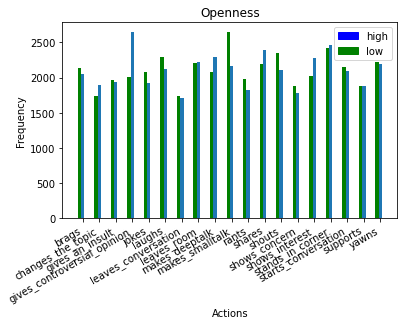

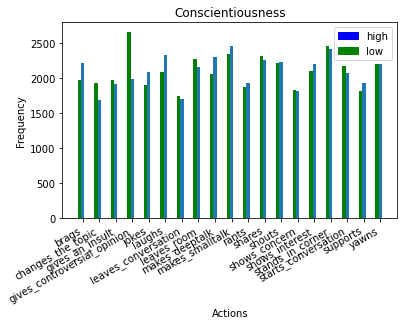

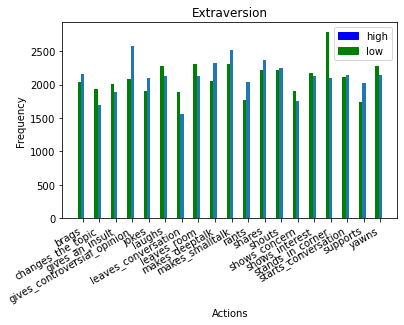

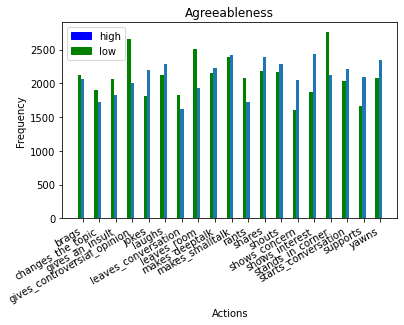

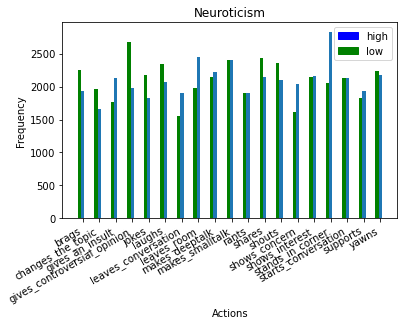

In [9]:
indipersonalityinfo = personinfo.loc[:,'person_before_action_personality_vector']

indi_action_history = personinfo.loc[:,'_action_name']
combined_personality_action = pd.concat([indipersonalityinfo,indi_action_history],axis=1)
o_list = []
c_list = []
e_list = []
a_list = []
n_list = []

#reads the string of personlaity and converts it into a new dataframe for easy searching
for item in indipersonalityinfo:

    split_item = item[1:-1].split(" ")
    newlist = []
    for item in split_item:
        if item != ' ' and item != '':
            newlist.append(item)
    o_list.append(float(newlist[0]))
    c_list.append(float(newlist[1]))
    e_list.append(float(newlist[2]))
    a_list.append(float(newlist[3]))
    n_list.append(float(newlist[4]))

seperate_personality_action = pd.DataFrame ({
    'Openness' : o_list,
    'Conscientiousness' : c_list,
    'Extraversion' : e_list,
    'Agreeableness' : a_list,
    'Neuroticism' : n_list,
    '_action_name' : indi_action_history
})

personality_types = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness','Neuroticism']
#looping through the various personality types
for i in range(0,len(personality_types)):
    high_personality_action = seperate_personality_action.loc[seperate_personality_action[personality_types[i]] == 1.0]
    high_personality_action = high_personality_action.loc[:,'_action_name']
    #==========================================================
    #need to update this to -1.0 when merging with main class
    #print("HELLOOOOO", seperate_personality_action)
    seperate_personality_action.to_csv('testingpersonalityerror.csv')
    low_personality_action = seperate_personality_action.loc[seperate_personality_action[personality_types[i]] == -1.0]
    low_personality_action = low_personality_action.loc[:,'_action_name']
    
    high_action_dist = freq_dist(high_personality_action)
    low_action_dist = freq_dist(low_personality_action)
    
    #Tried with plotly
#     combined_action_dist = pd.DataFrame([high_action_dist, low_action_dist])
#     combined_action_dist.rename(index = {0: 'high', 1: 'low'}, inplace=True)
#     combined_action_dist = combined_action_dist.transpose()
#     print(combined_action_dist)
#     fig = px.histogram(combined_action_dist, x="Action", y="Count",
#              color='High & low', barmode='group',
#              height=400)
#     fig.show()
    
    X = np.arange(len(high_action_dist))
    plt.bar(range(len(high_action_dist)), list(high_action_dist.values()), width=0.2, align='center')
    plt.bar(X-0.2, low_action_dist.values(), width=0.2, color='g', align='center')
    plt.xticks(range(len(high_action_dist)), list(high_action_dist.keys()))
    plt.rcParams.update({'font.size': 10})
    plt.title(personality_types[i])
    plt.ylabel('Frequency')
    plt.xlabel('Actions')
    
    
    colors = {'high':'blue', 'low':'green'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.gcf().autofmt_xdate()
    
    filepath = 'personalitygraphs/' + personality_types[i] + '.png'
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    
    
    